In [1]:
import os
from PIL import Image
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor, PILToTensor

import torch.nn as nn
import torch

In [2]:
data_dir = './data/cifar10'
train_data_dir = data_dir + "/train"

### First touch with images of cifar10

In [3]:
print("Folders in cifar10:", os.listdir(data_dir))
classes = os.listdir(train_data_dir)
print("Class folders in cifar10/train", classes)

Folders in cifar10: ['test', 'train']
Class folders in cifar10/train ['ship', 'truck', 'horse', 'dog', 'bird', 'deer', 'cat', 'frog', 'automobile', 'airplane']


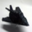

In [12]:
image = Image.open(train_data_dir + "/airplane/0001.png")
image

In [13]:
pixels = image.getdata()

In [18]:
print("get data gives me a list of 32 * 32 =", len(pixels), " pixel tuples, each consisting of three values, e.g. ", pixels[0])

get data gives me a list of 32 * 32 = 1024  pixel tuples, each consisting of three values, e.g.  (202, 204, 199)


In [20]:
print("This fits the the image mode of ", image.mode, "which needs three colour values between 0 and 255 per pixel.")

This fits the the image mode of  RGB which needs three colour values between 0 and 255 per pixel.


## Checking out ImageFolder loader of torchvision

<class 'PIL.Image.Image'>


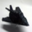

In [34]:
train_dataset = ImageFolder(
    root=train_data_dir
)
img, label = train_dataset[0]
print(type(img))
img

In [35]:
train_dataset_to_tensor = ImageFolder(
    root=train_data_dir,
    transform=PILToTensor()
)
img, label = train_dataset_to_tensor[0]
print(type(img))
img

<class 'torch.Tensor'>


tensor([[[202, 202, 204,  ..., 207, 205, 203],
         [206, 206, 207,  ..., 210, 208, 206],
         [210, 211, 212,  ..., 214, 212, 210],
         ...,
         [218, 210, 194,  ..., 243, 244, 243],
         [219, 217, 216,  ..., 241, 241, 241],
         [217, 216, 217,  ..., 239, 239, 240]],

        [[204, 204, 206,  ..., 208, 206, 204],
         [208, 208, 209,  ..., 211, 209, 207],
         [212, 213, 214,  ..., 214, 213, 211],
         ...,
         [217, 209, 194,  ..., 242, 242, 243],
         [218, 216, 216,  ..., 240, 240, 240],
         [216, 215, 216,  ..., 238, 238, 238]],

        [[199, 199, 201,  ..., 200, 199, 198],
         [203, 203, 204,  ..., 205, 203, 201],
         [207, 208, 210,  ..., 210, 208, 206],
         ...,
         [222, 214, 198,  ..., 247, 247, 247],
         [223, 221, 220,  ..., 245, 245, 245],
         [221, 220, 221,  ..., 243, 243, 243]]], dtype=torch.uint8)

In [36]:
train_dataset_to_tensor_scaled = ImageFolder(
    root=train_data_dir,
    transform=ToTensor()
)
img, label = train_dataset_to_tensor_scaled[0]
print(type(img))
img

<class 'torch.Tensor'>


tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],

        [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
         [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
         [0.8118, 0.8157, 0.8235,  ..., 0.8235, 0.8157, 0.

In [38]:
print(type(train_dataset))
print(len(train_dataset))

<class 'torchvision.datasets.folder.ImageFolder'>
50000


# Understanding conv2d layers
## Example of a 3 in 1 out size three kernel conv2d
Here I manually set the kernel weights of a single convolutional layer that would normally be initialized randomly.
The multiplications and additions a conv-layer performs can be observed in this very simple example.

In [11]:
conv1 = nn.Conv2d(3, 1, kernel_size=3, stride=1, padding=0)
conv1_kernel = torch.tensor(
    [
        [
            [
                [0., 0., 0.],
                [0., 1., 0.],
                [0., 0., 0.]
            ],
            [
                [0., 0., 0.],
                [0., 1., 0.],
                [0., 0., 0.]
            ],
            [
                [0., 0., 0.],
                [0., 1., 0.],
                [0., 0., 0.]
            ]
        ]
    ]
)

print("kernel dimension: out_channels * in channels * kernel_height * kernel_width", conv1_kernel.shape)

with torch.no_grad():
    conv1.weight = nn.Parameter(conv1_kernel)

simple_model = nn.Sequential(
    conv1
)

kernel dimension: out_channels * in channels * kernel_height * kernel_width torch.Size([1, 3, 3, 3])


In [20]:
sample_images = torch.tensor(
    [
        [
            [
                [3,2,1],
                [3,2,1],
                [3,2,1]
            ],
            [
                [3,2,1],
                [3,2,1],
                [3,2,1]
            ],
            [
                [3,2,1],
                [3,2,1],
                [3,2,1]
            ]
        ],
        [
            [
                [1,1,1],
                [1,1,1],
                [1,1,1]
            ],
            [
                [1,1,1],
                [1,1,1],
                [1,1,1]
            ],
            [
                [1,1,1],
                [1,1,1],
                [1,1,1]
            ]
        ]
    ],
    dtype=torch.float32)

print("input batch dimensions: batch_size * channels * image_height * image_width = ", sample_images.shape)
sample_batch_output = conv1(sample_images)
print("dimension of batch after conv1: batch_size * channels * image_height * image_width = ", sample_batch_output.shape)
print("The specified kernel only picks the middle element of each feature map and adds them up over the number of channels."
      f"So the result for the first example image id 1*2 + 1*2 + 1*2 + bias = 6 + {conv1.bias[0]} = {sample_batch_output[0][0][0][0]}")
sample_batch_output

input batch dimensions: batch_size * channels * image_height * image_width =  torch.Size([2, 3, 3, 3])
dimension of batch after conv1: batch_size * channels * image_height * image_width =  torch.Size([2, 1, 1, 1])
The specified kernel only picks the middle element of each feature map and adds them up over the number of channels.So the result for the first example image id 1*2 + 1*2 + 1*2 + bias = 6 + 0.10041365027427673 = 6.1004133224487305


tensor([[[[6.1004]]],


        [[[3.1004]]]], grad_fn=<ConvolutionBackward0>)